# Advertising

### Proje içerisinde TV, Radyo ve Gazete ilanlarına göre satış rakamları mevcut, hangi reklam yönetiminin daha başarılı olduğunu bulacağız.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns

<AxesSubplot:>

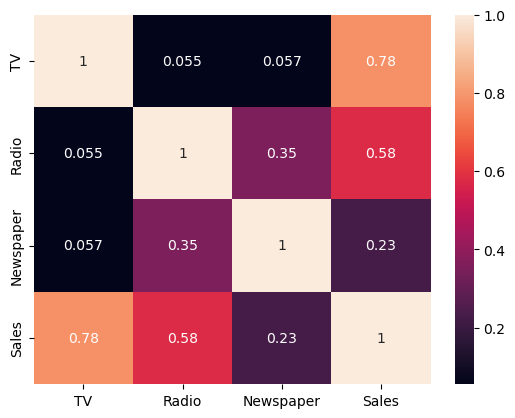

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
x= df[['TV','Radio','Newspaper']]

In [12]:
y = df[['Sales']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:

x_train , x_test, y_train , y_test = train_test_split(x , y , test_size= 0.20, random_state = 42)

In [20]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [21]:
from sklearn.metrics import r2_score , mean_squared_error

In [22]:
R = Ridge()
L = Lasso()
E = ElasticNet()

In [23]:
Rmodel = R.fit(x_train , y_train)
Lmodel = L.fit(x_train , y_train)
Emodel = E.fit(x_train , y_train)

In [24]:
predictR = Rmodel.predict(x_test)

In [25]:
r2_score(y_test,predictR)

0.89943810463304

In [26]:
predictL = Lmodel.predict(x_test)

In [27]:
r2_score(y_test , predictL)

0.9004013443377963

In [28]:
predictE = Emodel.predict(x_test)

In [29]:
r2_score(y_test , predictE)

0.8999611908219934

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [31]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.983584,0.719832,0.610735
XGBRegressor,0.972470,0.932166,0.725829
Extra Tree,0.965364,1.045586,0.802500
KNeighborsRegressor,0.963426,1.074426,0.885621
SVR,0.934851,1.433997,0.968690
AdaBoost,0.933719,1.446396,0.980000
Decision Tree,0.923504,1.553866,1.100000
Linear,0.899438,1.781600,1.460757
Ridge,0.889218,1.869940,1.525709
SGD,0.884210,1.911741,1.543729


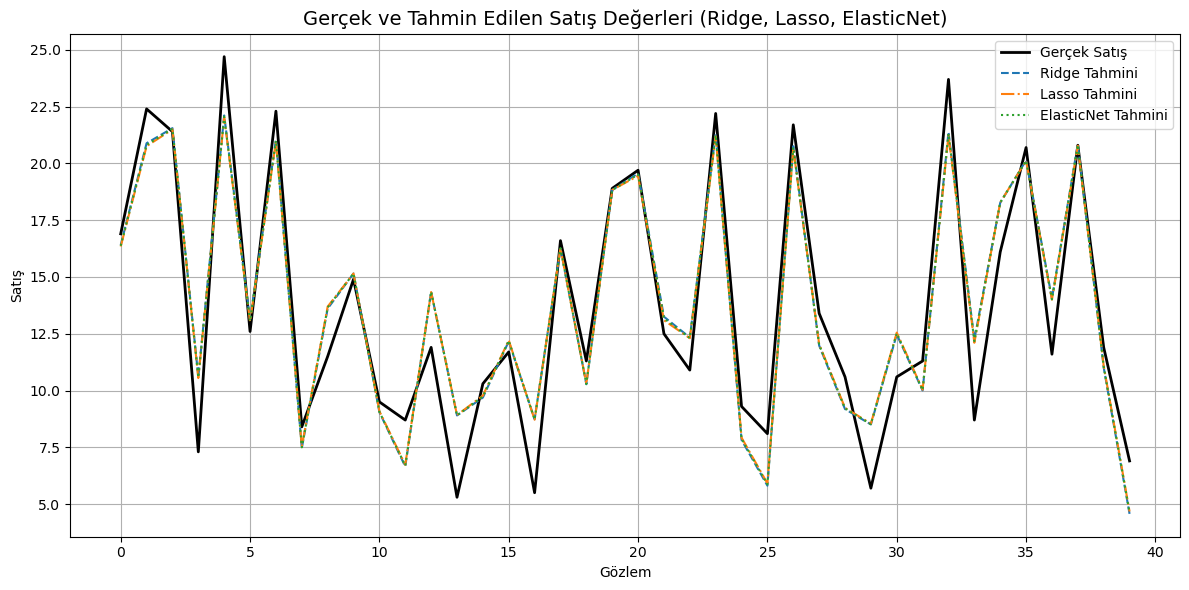

In [32]:
plt.figure(figsize=(12,6))

plt.plot(y_test.values, label='Gerçek Satış', linewidth=2, color='black')
plt.plot(predictR, label='Ridge Tahmini', linestyle='--')
plt.plot(predictL, label='Lasso Tahmini', linestyle='-.')
plt.plot(predictE, label='ElasticNet Tahmini', linestyle=':')

plt.title('Gerçek ve Tahmin Edilen Satış Değerleri (Ridge, Lasso, ElasticNet)', fontsize=14)
plt.xlabel('Gözlem')
plt.ylabel('Satış')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()